# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [14]:
df=pd.read_csv("Classified Data")


In [15]:
df

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [16]:
standard = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [17]:
standard.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = standard.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [19]:
df_params = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_params.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [20]:
from sklearn.model_selection import train_test_split
X = df_params
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [24]:
Con_matrix = metrics.confusion_matrix(y_test,y_pred)
print("The Confusion Matrix is:")
print(Con_matrix)

The Confusion Matrix is:
[[232  18]
 [ 26 224]]


***Print Misclassification error rate***

In [25]:
misclass_error_rate=np.mean( y_pred!= y_test)
print(misclass_error_rate)

0.088


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [26]:
X_validation, X_test, y_validation, y_test = train_test_split(X_test,y_test,
                                                    test_size=0.50, random_state=101)

In [27]:
misclass_error_array=[0] * 10
for i in range(10):
 knn = KNeighborsClassifier(n_neighbors=i+1)
 knn.fit(X_train,y_train)
 y_pred = knn.predict(X_validation)
 misclass_error_array[i] =np.mean( y_pred!= y_validation)
 

In [28]:
x=list(range(1, 11))

Text(0, 0.5, 'Cross Validation error')

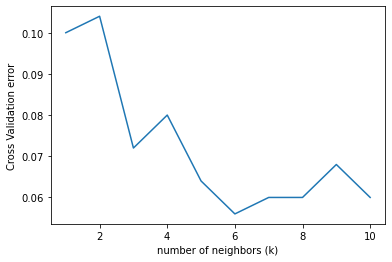

In [30]:
plt.plot(x,misclass_error_array)
plt.xlabel("number of neighbors (k)")
plt.ylabel("Cross Validation error")